## Simple Linear Regression

### import Laibraries

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### importing dataset

In [64]:
#importing dataset
df=pd.read_csv('SLR_Salary_Data.csv')
#cheaking data in dataframe
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## EDA 

In [65]:
#finding null values from dataset
df.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [66]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [67]:
#get distribution of feratures
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


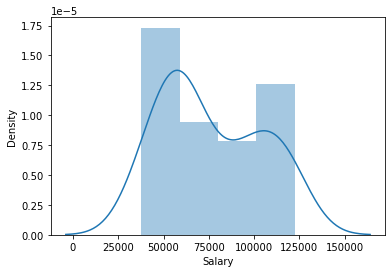

In [68]:
#get salary Value Distribution
sns.distplot(df.Salary)

- Here data not normaly distributes 

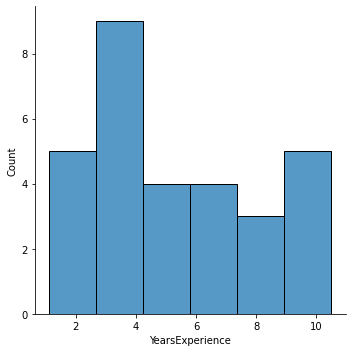

In [69]:
#visulaize Target value distribution
sns.displot(df.YearsExperience)

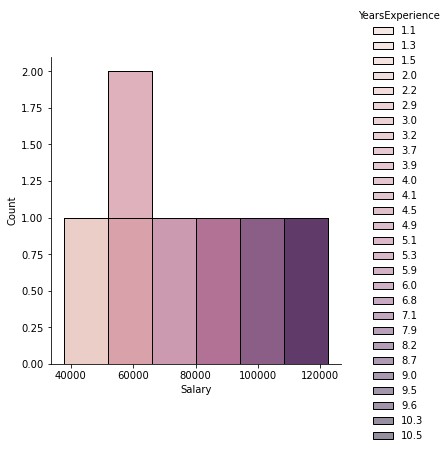

In [70]:
#visulize target value and salary distribution 
sns.displot(df,x='Salary', hue='YearsExperience')

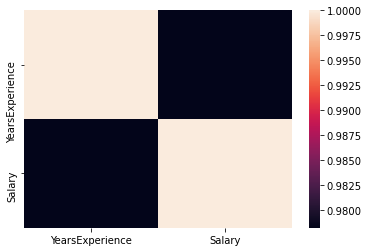

In [71]:
#finding correlation betwwen cloumns
corr=df.corr()
sns.heatmap(corr)

## Creating Mertircs of features X and create dependent variavble y

In [72]:
X=df.iloc[:,:-1].values
y=df.iloc[:,1].values

In [73]:
#Performing standrd scaling 

'''from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)'''

'from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nsc.fit(X)\nX=sc.transform(X)'

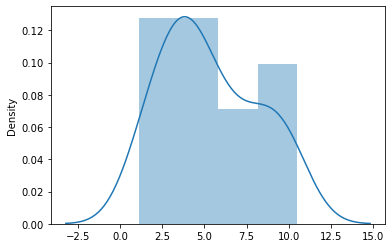

In [74]:
#ploting x distribution
sns.distplot(X)

## Spliting dataset into train test set

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Creating model of simple linear regression

In [55]:
from sklearn.linear_model import LinearRegression

In [96]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

     
Ordinary least squares Linear Regression.

LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
to minimize the residual sum of squares between the observed targets in
the dataset, and the targets predicted by the linear approximation.



Attributes
----------
coef_ : array of shape (n_features, ) or (n_targets, n_features)
    Estimated coefficients for the linear regression problem.
    If multiple targets are passed during the fit (y 2D), this
    is a 2D array of shape (n_targets, n_features), while if only
    one target is passed, this is a 1D array of length n_features.

rank_ : int
    Rank of matrix `X`. Only available when `X` is dense.

singular_ : array of shape (min(X, y),)
    Singular values of `X`. Only available when `X` is dense.

intercept_ : float or array of shape (n_targets,)
    Independent term in the linear model. Set to 0.0 if
    `fit_intercept = False`.





In [99]:
# analysis model performace
print(regressor.score(X, y))
print(regressor.coef_)
print(regressor.intercept_)


y_pred=regressor.predict(x_test)

print(y_test,y_pred)

0.9565144135078991
[9360.26128619]
26777.391341197632
[ 37731. 122391.  57081.  63218. 116969. 109431. 112635.  55794.  83088.] [ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [88]:
from statsmodels.api import OLS
OLS(x_train,y_train).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.966
Method:                 Least Squares   F-statistic:                              597.4
Date:                Tue, 22 Sep 2020   Prob (F-statistic):                    2.27e-16
Time:                        01:06:33   Log-Likelihood:                         -29.628
No. Observations:                  21   AIC:                                      61.26
Df Residuals:                      20   BIC:                                      62.30
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          7.082e-05    2.9e-06     24.443      0.000    6.48e-05    7.69e-05
==============================================================================
Omnibus:                        0.407   Durbin-Watson:                   2.811
Prob(Omnibus):                  0.816   Jarque-Bera (JB):                0.328
Skew:                           0.267   Prob(JB):                        0.849
Kurtosis:                       2.701   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Predicting Test result

###### Visualiasing traning set result

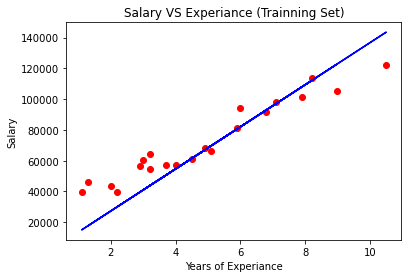

In [91]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Salary VS Experiance (Trainning Set)")
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')
plt.show()

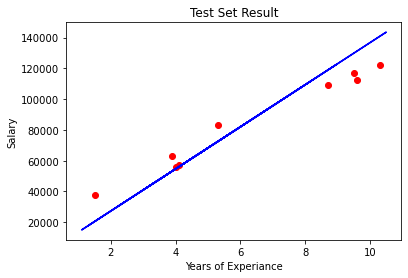

In [92]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Test Set Result")
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')
plt.show()

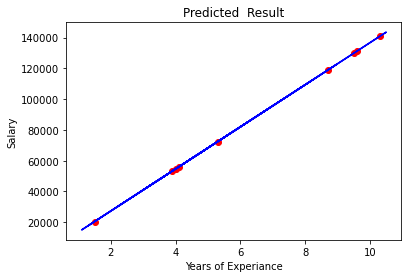

In [93]:
plt.scatter(x_test,y_pred,color='red')
plt.plot(x_train,regressor.predict(x_train), color='blue')
plt.title("Predicted  Result")
plt.xlabel('Years of Experiance')
plt.ylabel('Salary')
plt.show()